In [1]:
import numpy as np

class pcn:
	def __init__(self,inputs,targets):
		if np.ndim(inputs)>1:
			self.nIn = np.shape(inputs)[1]
			#print("nIn = ",self.nIn)            
		else: 
			self.nIn = 1
	
		if np.ndim(targets)>1:
			self.nOut = np.shape(targets)[1]
			#print("nOut = ",self.nOut)            
		else:
			self.nOut = 1
		self.nData = np.shape(inputs)[0]

		# Initialise network
		# nIn is the number of input nodes
		# np.random.rand(a,b) return an a x b matrix
		self.weights = np.random.rand(self.nIn+1,self.nOut)*0.1-0.05
		#print("Weights",self.weights) # of dimension 3 x 1       

	def pcntrain(self,inputs,targets,eta,nIterations):
		# Add the inputs that match the bias node
		#print("Inputs sent to pcntrain\n",inputs)
		inputs = np.concatenate((inputs,-np.ones((self.nData,1))),axis=1) 
        #axis is used for the concatenate function thus we concat along axis = 1 i.e. columns
		#print("Inputs after concat in pcntrain\n",inputs)# Training

		for n in range(nIterations):
			
			self.activations = self.pcnfwd(inputs);
			self.weights -= eta*np.dot(np.transpose(inputs),self.activations-targets)
		

	def pcnfwd(self,inputs):
		# Compute activations
		activations =  np.dot(inputs,self.weights)
		#print("Activations in pcnfwd",activations.shape)

		# Threshold the activations
		return np.where(activations>0,1,0)


	def confmat(self,inputs,targets):

		# Add the inputs that match the bias node
		inputs = np.concatenate((inputs,-np.ones((self.nData,1))),axis=1)
		#print("Inputs sent to confmat\n",inputs)
		outputs = np.dot(inputs,self.weights)

		nClasses = np.shape(targets)[1] + 1
		#print("No of classes",nClasses)
        

		outputs = np.where(outputs>0,1,0)

		#print("Outputs\n",outputs)
        
		cm = np.zeros((nClasses,nClasses))
		for i in range(nClasses):
			for j in range(nClasses):
				cm[i,j] = np.sum(np.where(outputs==i,1,0)*np.where(targets==j,1,0))

		print(cm)
		print("Accuracy is ",np.trace(cm)/np.sum(cm)*100,"%")
		

In [2]:
import pylab as pl
import numpy as np
import pandas as pd


pima = pd.read_csv('pima-indians-diabetes.csv',sep=",")
pima.head()
np.shape(pima)
pima

,A,B,C,D,E,F,G,H,I
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
Output on original data
[[  3.   2.]
 [497. 266.]]
Accuracy is  35.02604166666667 %
----------------------------------------------------------------------
mean [  3.84505208 120.89453125  69.10546875  20.53645833  79.79947917
  31.99257812   0.4718763   33.24088542   0.34895833]
var [1.13392724e+01 1.02091726e+03 3.74159449e+02 2.54141900e+02
 1.32638869e+04 6.20790465e+01 1.09635697e-01 1.38122964e+02
 2.27186415e-01]
max [ 17.   199.   122.    99.   846.    67.1    2.42  81.     1.  ]
min [ 0.     0.     0.     0.     0.     0.     0.078 21.     0.   ]
----------------------------------------------------------------------
mean [-2.31296463e-18  0.00000000e+00 -7.22801448e-19  3.03576608e-18
 -3.56883215e-19  3.29597460e-17  7.03141249e-16 -8.21102445e-17
  3.48958333e-01]
var [1.28606527e-01 9.79511306e-04 2.67265734e-03 3.93480965e-03
 7.53926816e-05 1.61084948e-02 9.12111683e+00 7.90302374e-01
 2.27186415e-01]
max [ 0.57

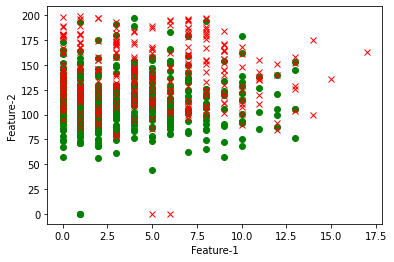

In [4]:
import pylab as pl
import numpy as np
import pandas as pd

pima = pd.read_csv('pima-indians-diabetes.csv',sep=",")
print(type(pima))
pima = pima.values
print(type(pima))
# Plot the first and second values for the two classes
indices0 = np.where(pima[:,8]==0)
indices1 = np.where(pima[:,8]==1)

pl.plot(pima[indices0,0],pima[indices0,1],'go')
pl.plot(pima[indices1,0],pima[indices1,1],'rx')
pl.xlabel("Feature-1")
pl.ylabel("Feature-2")

# Perceptron training on the original dataset

print("Output on original data")
p = pcn(pima[:,:8],pima[:,8:9])
p.pcntrain(pima[:,:8],pima[:,8:9],0.25,100)
p.confmat(pima[:,:8],pima[:,8:9])

print("----------------------------------------------------------------------")
print("mean",pima.mean(axis=0))
print("var",pima.var(axis=0))
print("max",pima.max(axis=0))
print("min",pima.min(axis=0))
print("----------------------------------------------------------------------")

# Various preprocessing steps
pima[np.where(pima[:,0]>8),0] = 8

pima[np.where(pima[:,7]<=30),7] = 1
pima[np.where((pima[:,7]>30) & (pima[:,7]<=40)),7] = 2
pima[np.where((pima[:,7]>40) & (pima[:,7]<=50)),7] = 3
pima[np.where((pima[:,7]>50) & (pima[:,7]<=60)),7] = 4
pima[np.where(pima[:,7]>60),7] = 5

pima[:,:8] = pima[:,:8]-pima[:,:8].mean(axis=0)
pima[:,:8] = pima[:,:8]/pima[:,:8].var(axis=0)

print("mean",pima.mean(axis=0))
print("var",pima.var(axis=0))
print("max",pima.max(axis=0))
print("min",pima.min(axis=0))
print("----------------------------------------------------------------------")

trainin = pima[::2,:8]
testin = pima[1::2,:8]
traintgt = pima[::2,8:9]
testtgt = pima[1::2,8:9]

# Perceptron training on the preprocessed dataset
print("Output after preprocessing of data")
p1 = pcn(trainin,traintgt)
p1.pcntrain(trainin,traintgt,0.25,100)
p1.confmat(testin,testtgt)



pl.show()